In [1]:
{'mail': 'kiselev.ns@phystech.edu',
 'id': 3022327224,
 'type': 'regression',
 'dataset': {'name': 'Forest Fires Data Set',
  'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
 'method': ['Перцептрон', 'Надарая-Ватсона', 'SVR']}

{'mail': 'kiselev.ns@phystech.edu',
 'id': 3022327224,
 'type': 'regression',
 'dataset': {'name': 'Forest Fires Data Set',
  'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
 'method': ['Перцептрон', 'Надарая-Ватсона', 'SVR']}

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка выборки

In [3]:
data = pd.read_csv("forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


For more information, read [Cortez and Morais, 2007].
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

# Анализ данных

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Обратим внимание на то, что ни в одном признаке нет пропущенных значений.

Объем выборки составляет 517 объектов, каждый из которых характеризуется 12 признаками. Целевая переменная — площадь сгоревшего леса в гектарах. Среди признаков есть 4 категориальных: X, Y, month, day, а также 8 числовых (все оставшиеся).

Положения пожаров на рассматриваемой местности фиксируются координатами X и Y, поэтому для визуализации данных построим heatmap с количеством пожаров в этих областях.

Text(0.5, 1.0, 'Количество пожаров')

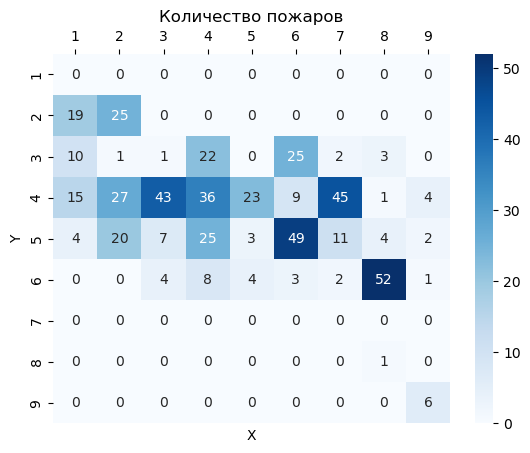

In [115]:
freq = np.zeros((9, 9))

for x, y in data[['X', 'Y']].values:
    freq[y-1, x-1] += 1

fig, ax = plt.subplots()
sns.heatmap(freq, annot=True, cmap="Blues")
locs, labels = plt.xticks()
plt.xticks(locs, [str(i) for i in range(1, 10)])
locs, labels = plt.yticks()
plt.yticks(locs, [str(i) for i in range(1, 10)])
plt.xlabel('X')
plt.ylabel('Y')
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.title("Количество пожаров")

<Axes: >

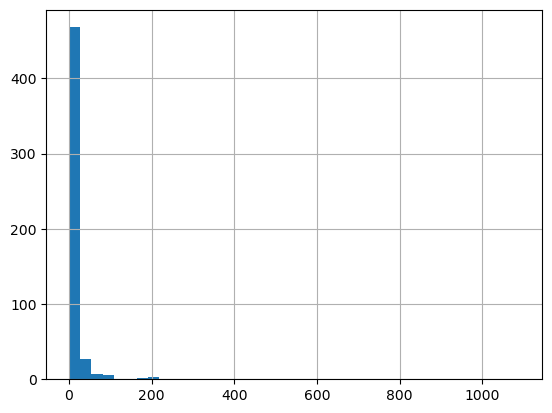

In [121]:
data['area'].hist(bins=40)